# импортируем библиотеки и загружаем фаил

In [1]:
#!pip install ucimlrepo
import pandas as pd
import numpy as np
import seaborn as sns

from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

#Работа с признаками

## посмотрим на наши данные

In [2]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [3]:
X.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [4]:

# @title Размер датафрейма
X.shape

(6497, 11)

In [5]:
# @title Описание данных
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


In [6]:
# @title Пропуски
X.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [7]:
# @title Проверка на значение Nan
X.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

Как мы можем заметить все признаки находятся в числовом виде , что благоволит нам и уберает необходимость их кодировать

## Обработка данных

Пропусков в признаках не наблюдается

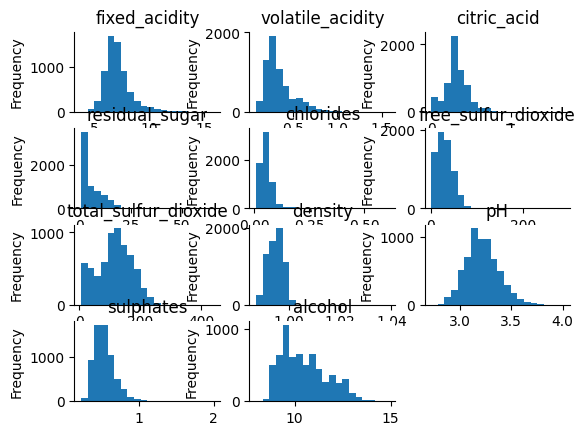

In [8]:
# @title Распределение данных

from matplotlib import pyplot as plt
a,b,c = 4,3,1
for data in X:
    plt.subplot(a,b,c)
    c += 1
    X[data].plot(kind='hist', bins=20, title=data)
    plt.gca().spines[['top', 'right',]].set_visible(False)

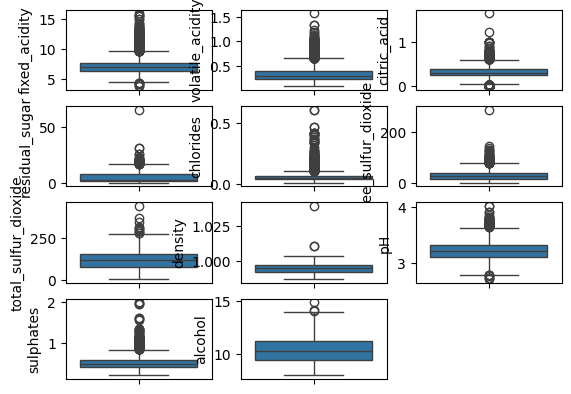

In [9]:
# @title Выбросы
a,b,c = 4,3,1
for data in X:
    plt.subplot(a,b,c)
    c += 1
    sns.boxplot(X[data])
plt.show()

In [10]:
# Функция для межквартильной фильтрации
def iqr_filter(df):
    # Инициализируем маску для фильтрации
    mask = pd.Series([True] * len(df))  # Все строки изначально считаем подходящими

    # Проходим по каждому числовому столбцу в DataFrame
    for column in df.select_dtypes(include=['number']).columns:
        # Вычисляем первый (Q1) и третий (Q3) квартиль
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        
        # Вычисляем межквартильный размах (IQR)
        IQR = Q3 - Q1
        
        # Определяем нижнюю и верхнюю границы для выбросов
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Выводим границы для диагностики
        print(f"Column: {column}")
        print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
        print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}\n")
        
        # Обновляем маску, исключая выбросы
        mask &= (df[column] >= lower_bound) & (df[column] <= upper_bound)

    # Возвращаем отфильтрованный DataFrame
    return df[mask]



# Применяем межквартильную фильтрацию к DataFrame
filtered_df = iqr_filter(X)


Column: fixed_acidity
Q1: 6.4, Q3: 7.7, IQR: 1.2999999999999998
Lower Bound: 4.450000000000001, Upper Bound: 9.65

Column: volatile_acidity
Q1: 0.23, Q3: 0.4, IQR: 0.17
Lower Bound: -0.024999999999999994, Upper Bound: 0.655

Column: citric_acid
Q1: 0.25, Q3: 0.39, IQR: 0.14
Lower Bound: 0.03999999999999998, Upper Bound: 0.6000000000000001

Column: residual_sugar
Q1: 1.8, Q3: 8.1, IQR: 6.3
Lower Bound: -7.6499999999999995, Upper Bound: 17.549999999999997

Column: chlorides
Q1: 0.038, Q3: 0.065, IQR: 0.027000000000000003
Lower Bound: -0.002500000000000009, Upper Bound: 0.10550000000000001

Column: free_sulfur_dioxide
Q1: 17.0, Q3: 41.0, IQR: 24.0
Lower Bound: -19.0, Upper Bound: 77.0

Column: total_sulfur_dioxide
Q1: 77.0, Q3: 156.0, IQR: 79.0
Lower Bound: -41.5, Upper Bound: 274.5

Column: density
Q1: 0.99234, Q3: 0.99699, IQR: 0.004650000000000043
Lower Bound: 0.9853649999999999, Upper Bound: 1.003965

Column: pH
Q1: 3.11, Q3: 3.32, IQR: 0.20999999999999996
Lower Bound: 2.795, Upper Bo

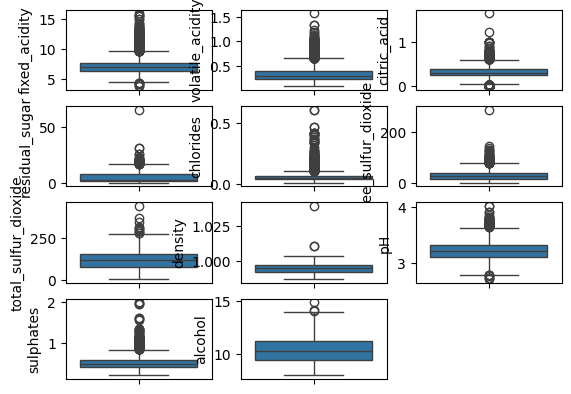

In [11]:
# @title Выбросы
a,b,c = 4,3,1
for data in filtered_df:
    plt.subplot(a,b,c)
    c += 1
    sns.boxplot(X[data])
plt.show()

Как мы можем заметить часть данных имеет колоссальныые выбросы

In [12]:
filtered_df.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5


<Axes: >

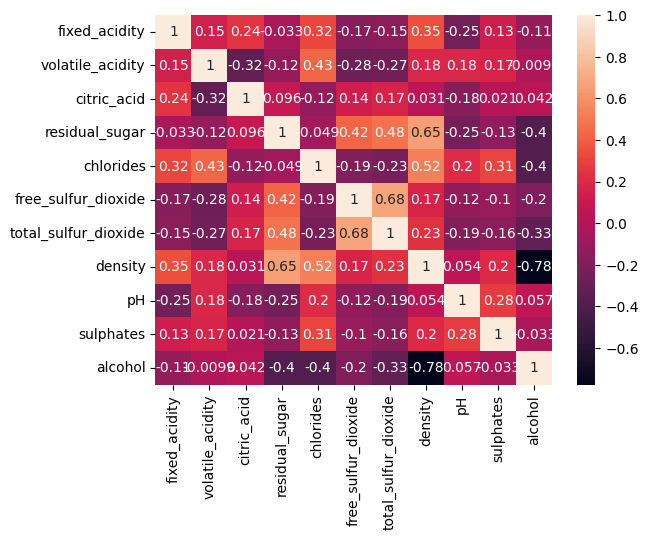

In [13]:

# @title Корреляция


sns.heatmap(
        filtered_df.corr(),
        annot=True,
        fmt='0.2g',
)

как мы видем все стоблики имею сильную корреляцию я другими но , недостаточно для их удаление( не превышающие 0.73)

#Работа с тагретом

In [14]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [15]:
# @title Информация о таргетах
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   quality  6497 non-null   int64
dtypes: int64(1)
memory usage: 50.9 KB


In [16]:
y.describe()

,quality
count,6497.000000
mean,5.818378
std,0.873255
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,9.000000


<Axes: >

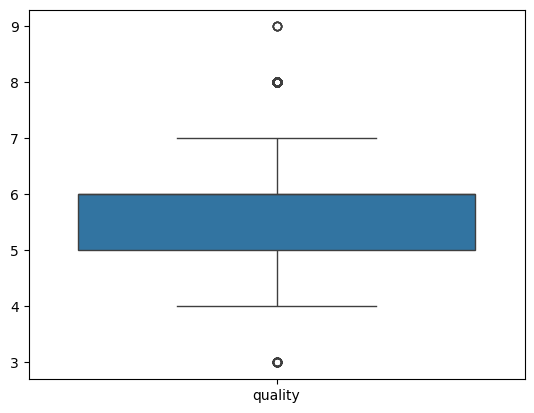

In [17]:
sns.boxplot(y)

<Axes: >

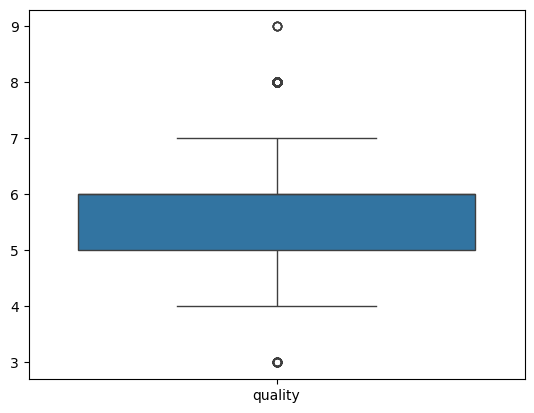

In [18]:
# @title Выбросы
sns.boxplot(y)

In [19]:
y.value_counts()

quality
6          2836
5          2138
7          1079
4           216
8           193
3            30
9             5
Name: count, dtype: int64

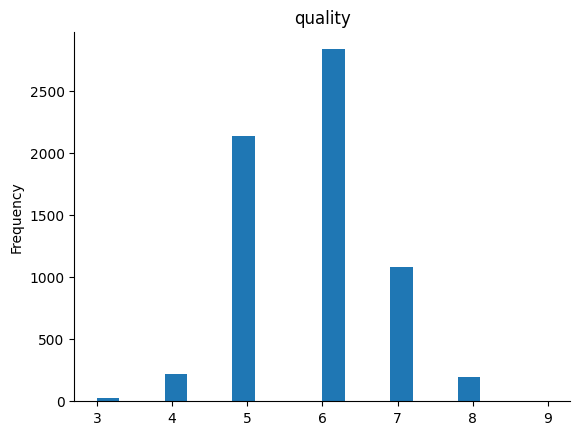

In [20]:
# @title Распределение классов

from matplotlib import pyplot as plt
y['quality'].plot(kind='hist', bins=20, title='quality')
plt.gca().spines[['top', 'right',]].set_visible(False)

попробуем обьединить данный в один фильтр


In [21]:

from sklearn.utils import resample

# Пример DataFrame
data = {
    'quality': [6]*2836 + [5]*2138 + [7]*1079 + [4]*216 + [8]*193 + [3]*30 + [9]*5
}
y = pd.DataFrame(data)

# Преобразование классов
y['quality'] = y['quality'].replace({7: 5, 3: 5, 4: 6, 8: 6})

# Проверка новых распределений
print(y['quality'].value_counts())

# Теперь у нас есть классы 5, 6 и 0 (если вы хотите создать бинарный формат)
# Для этого создадим новый столбец с бинарными значениями
y['binary_quality'] = y['quality'].apply(lambda x: 1 if x == 5 else 0)

# Проверка нового распределения
print(y['binary_quality'].value_counts())

# Сбалансируем классы
count_class_0 = y['binary_quality'].value_counts()[0]
count_class_1 = y['binary_quality'].value_counts()[1]

if count_class_0 > count_class_1:
    # Уменьшаем класс 0
    df_class_0 = y[y['binary_quality'] == 0]
    df_class_0_downsampled = resample(df_class_0,
                                       replace=False,
                                       n_samples=count_class_1,
                                       random_state=123)
    df_balanced = pd.concat([df_class_0_downsampled, y[y['binary_quality'] == 1]])
else:
    # Увеличиваем класс 1
    df_class_1 = y[y['binary_quality'] == 1]
    df_class_1_upsampled = resample(df_class_1,
                                     replace=True,
                                     n_samples=count_class_0,
                                     random_state=123)
    df_balanced = pd.concat([y[y['binary_quality'] == 0], df_class_1_upsampled])

# Проверяем сбалансированные классы
print(df_balanced['binary_quality'].value_counts())



quality
5    3247
6    3245
9       5
Name: count, dtype: int64
binary_quality
0    3250
1    3247
Name: count, dtype: int64
binary_quality
0    3247
1    3247
Name: count, dtype: int64


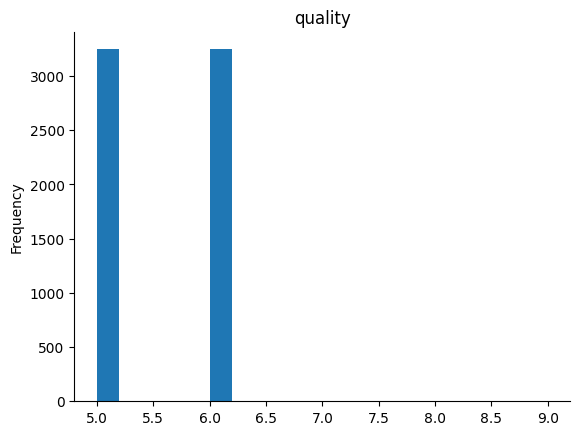

In [22]:
# @title Распределение классов

from matplotlib import pyplot as plt
y['quality'].plot(kind='hist', bins=20, title='quality')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [23]:
# @title Приводим к одному размеру
min_length = min(len(filtered_df), len(y))
filtered_df = filtered_df.iloc[:min_length]
y = y.iloc[:min_length]


In [24]:
# @title Распределение данных на обучающие и тестовые
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
filtered_df,
y.drop(['quality'],axis= 1 ),
test_size=0.15,
random_state= 42
)

# Logistick Regression

In [25]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.preprocessing import StandardScaler

In [26]:
pipe = Pipeline(
    [
        ('SK', StandardScaler()),
        ('Classifier', LogisticRegressionCV())
    ]
)

In [27]:
pipe.fit(X_train,y_train)

c:\Users\grimm\Documents\Stronghold_of_Digital_Martyrdom\Data_Science\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('SK', StandardScaler()),
                ('Classifier', LogisticRegressionCV())])

In [28]:
y_pred = pipe.predict(X_test)
print(f'Точность модели {accuracy_score(y_test, y_pred)}')
print(f'Среднее абсолютная ошибка {mean_absolute_error(y_test, y_pred)}')

Точность модели 0.7798408488063661
Среднее абсолютная ошибка 0.22015915119363394


#Knn

In [29]:
from sklearn.neighbors import KNeighborsClassifier


In [30]:
knn_pipe = Pipeline(
    [
        ('SK', StandardScaler()),
        ("Knn", KNeighborsClassifier(4))
    ]
)

In [31]:
knn_pipe.fit(X_train,y_train)

c:\Users\grimm\Documents\Stronghold_of_Digital_Martyrdom\Data_Science\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('SK', StandardScaler()),
                ('Knn', KNeighborsClassifier(n_neighbors=4))])

In [32]:
knn_pred = knn_pipe.predict(X_test)
print(f'Точность модели {accuracy_score(y_test, knn_pred)}')
print(f'Среднее абсолютная ошибка {mean_absolute_error(y_test, knn_pred)}')

Точность модели 0.8103448275862069
Среднее абсолютная ошибка 0.1896551724137931



## Визуализация матрицы путаницы
Визуализируем матрицу путаницы:



In [37]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, pipe.predict(X_test)).ravel()

print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

True Negative: 350
False Positive: 78
False Negative: 88
True Positive: 238


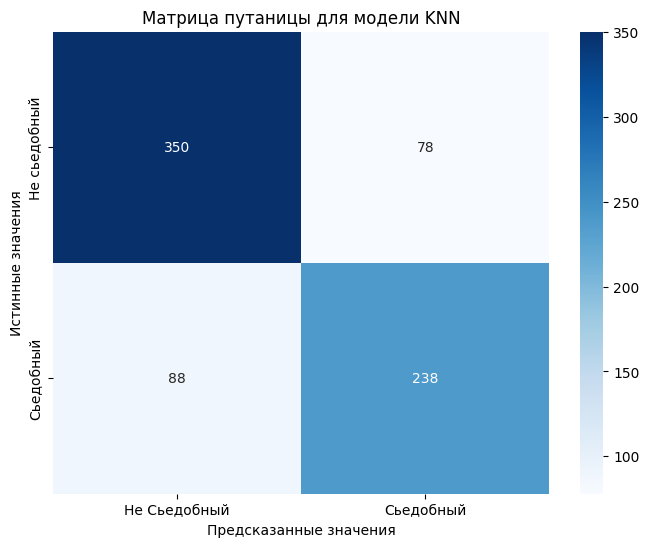

In [38]:

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Не Cьедобный', 'Сьедобный'],
            yticklabels=['Не сьедобный', 'Сьедобный'])
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.title('Матрица путаницы для модели KNN')
plt.show()



## Построение ROC-кривой
Теперь построим ROC-кривую для оценки качества модели:



### Получаем вероятности предсказаний для положительного класса

In [33]:
y_probs = pipe.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса

### Вычисляем значения для ROC-кривой

In [34]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

### Визуализируем ROC-кривую

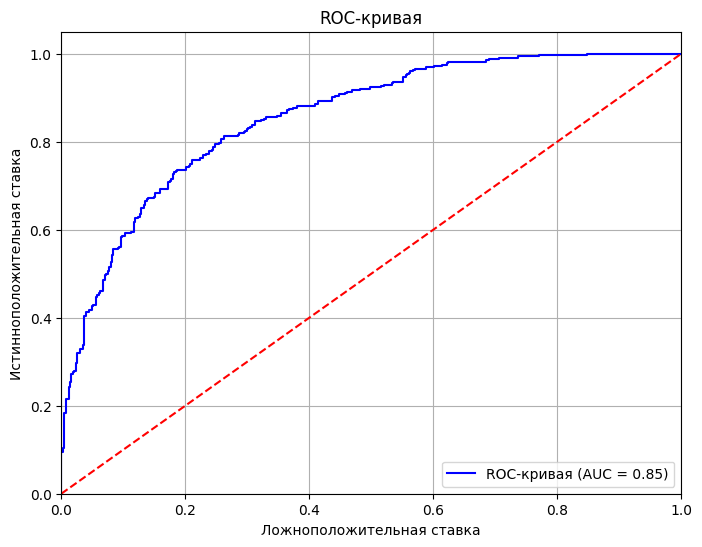

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC-кривая (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Линия случайного выбора
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительная ставка')
plt.ylabel('Истинноположительная ставка')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.grid()
plt.show()